In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('processedData.csv')

In [3]:
data

,Unnamed: 0,id,uniqueId,rarePity,total,rare,legendary,bannerId,pityCount
0,0,32974147,06848886,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",7,0,0,300020,"[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,32974224,28c062e4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",5,0,0,400020,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,32974120,e073dfd9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,0,0,400019,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,32974532,7c2de415,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",5,0,0,400019,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,32974647,33453911,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",2,0,0,400019,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...
1605,1605,32973892,84223d24,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",3,0,0,400019,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1606,1606,32972341,56388386,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",2,0,0,300020,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1607,1607,32972641,bb9df5ee,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",6,0,0,400020,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1608,1608,32972653,28f7a5be,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,0,0,400020,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [4]:
pityCount = data['pityCount']
pityCount = [[int(j) for j in i.strip('][').split(', ')] for i in pityCount]
pityCount = np.array(pityCount)

rarePity = data['rarePity']
rarePity = [[int(j) for j in i.strip('][').split(', ')] for i in rarePity]
rarePity = np.array(rarePity)

In [5]:
print(pityCount.shape, rarePity.shape)

(1610, 91) (1610, 11)


In [6]:
np.sum(pityCount, axis=0)

array([1653, 1083,  795,  639,  514,  330,  217,  121,   81,   70,    6,
          4,    4,    4,    3,    3,    3,    2,    1,    1,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0])

In [7]:
pityCount.shape

(1610, 91)

''

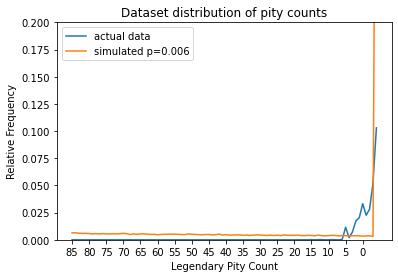

In [8]:
freqs = -np.sum(np.diff(pityCount, axis=1), axis=0)
freqs = freqs/np.sum(pityCount)

plt.title("Dataset distribution of pity counts")
plt.plot(np.arange(0, 90)[::-1], freqs, label="actual data")
plt.xticks(np.arange(0, 90, 5), labels=np.arange(0, 90, 5)[::-1])
plt.ylabel("Relative Frequency")
plt.xlabel("Legendary Pity Count")
# plt.vlines([9, 15, 25, 69, 79], min(freqs), max(freqs), color='red', alpha=0.25)

p = 0.006
simulation = np.random.geometric(p, size=100000)
s = np.zeros(shape=(90,))
for i in range(len(s)):
    s[i] = len(np.where(simulation == i+1)[0])
s[-1] = len(np.where(simulation >= 90)[0])


freqs = s/np.sum(s)
plt.plot(np.arange(90), freqs, label="simulated p=0.006")
plt.xticks(np.arange(0, 90, 5), labels=np.arange(0, 90, 5)[::-1])

plt.ylim([0, 0.2])

plt.legend()

;

''

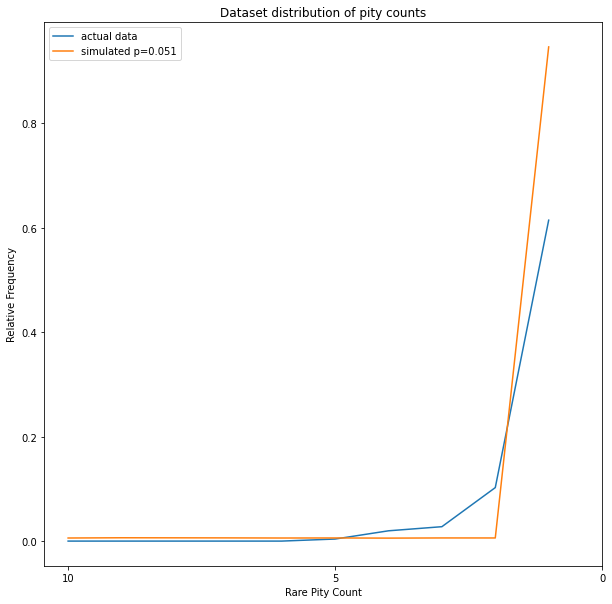

In [330]:
freqs = -np.sum(np.diff(rarePity, axis=1), axis=0)
freqs = freqs/np.sum(rarePity)

plt.title("Dataset distribution of pity counts")
plt.plot(np.arange(0, 10)[::-1], freqs, label="actual data")
plt.xticks(np.arange(0, 10, 5), labels=np.arange(0, 10, 5)[::-1])
plt.ylabel("Relative Frequency")
plt.xlabel("Rare Pity Count")
# plt.vlines([9, 15, 25, 69, 79], min(freqs), max(freqs), color='red', alpha=0.25)

p = 0.006
simulation = np.random.geometric(p, size=100000)
s = np.zeros(shape=(10,))
for i in range(len(s)):
    s[i] = len(np.where(simulation == i+1)[0])
s[-1] = len(np.where(simulation >= 10)[0])


freqs = s/np.sum(s)
plt.plot(np.arange(10), freqs, label="simulated p=0.051")
plt.xticks(np.arange(0, 11, 5), labels=np.arange(0, 11, 5)[::-1])

plt.legend()

;

In [10]:
pulls = pd.read_csv('Data/Raw/pulls.csv')

In [11]:
print(len(np.unique(pulls['wishId'].to_numpy())))

149282


In [12]:
pulls

,id,time,name,pity,type,grouped,wishId,bannerId,guaranteed,rarity
0,160226106,2021-12-07 20:31:57+00,sucrose,5,character,t,33126977,100001,f,4
1,160253216,2021-11-02 22:22:11+00,diona,8,character,f,33130214,300021,f,4
2,160253217,2021-11-02 22:22:15+00,thoma,9,character,f,33130214,300021,t,4
3,160253218,2021-11-02 22:22:18+00,thoma,10,character,f,33130214,300021,f,4
4,160253219,2021-11-02 22:30:23+00,diona,10,character,f,33130214,300021,t,4
...,...,...,...,...,...,...,...,...,...,...
1321262,159066198,2021-11-02 19:50:00+00,mouuns_moon,5,weapon,f,32986612,400020,f,4
1321263,159066199,2021-11-02 19:50:14+00,wavebreakers_fin,8,weapon,t,32986612,400020,t,4
1321264,159066200,2021-11-02 19:51:53+00,the_widsith,8,weapon,f,32986612,400020,f,4
1321265,159066201,2021-11-03 11:00:03+00,mouuns_moon,7,weapon,t,32986612,400020,t,4


In [13]:
print(len(np.where(pulls['rarity'] == 5)[0]))
print(len(np.where(pulls['rarity'] == 4)[0]))

136312
1184955


In [14]:
print('Guaranteed: \t\t', len(np.where(pulls['guaranteed'] == 't')[0]))
print('Not Guaranteed: \t', len(np.where(pulls['guaranteed'] == 'f')[0]))

Guaranteed: 		 209750
Not Guaranteed: 	 1111517


Text(0.5, 1.0, 'pity count when legendary was obtained (Composite)')

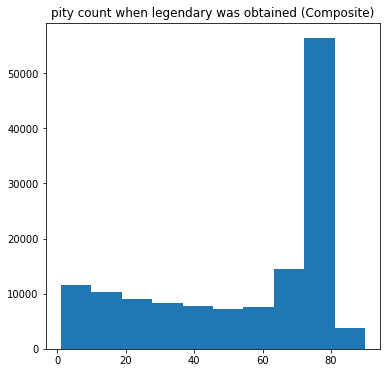

In [362]:
plt.rcParams['figure.figsize'] = (6,6)

inds = np.where(pulls['rarity'] == 5)[0]
plt.hist(pulls['pity'][inds])

plt.title('pity count when legendary was obtained (Composite)')

Text(0.5, 1.0, 'pity count when rare was obtained (Composite)')

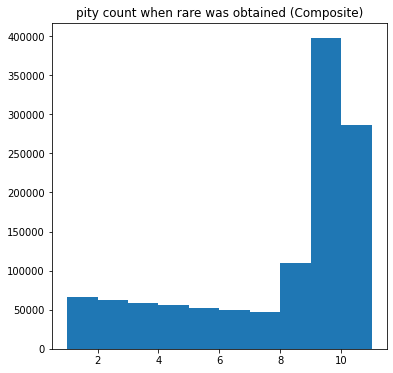

In [363]:
inds = np.where(pulls['rarity'] == 4)[0]
plt.hist(pulls['pity'][inds])

plt.title('pity count when rare was obtained (Composite)')

Text(0.5, 1.0, 'pity when 5-star obtained (ungrouped) - 55.45')

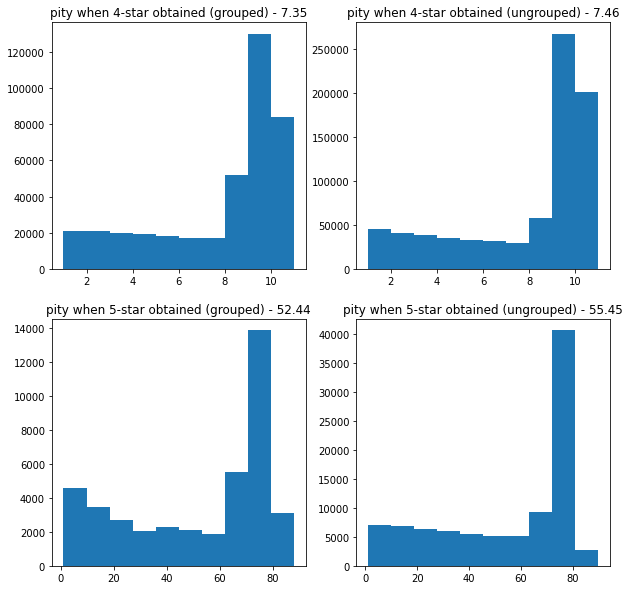

In [17]:
fig = plt.figure(figsize=(10, 10))
ax = fig.subplots(2, 2)

inds = np.where(np.logical_and(pulls['rarity'] == 4, pulls['grouped'] == 't'))[0]
ax[0][0].hist(pulls['pity'][inds])
avg = np.mean(pulls['pity'][inds])
ax[0][0].set_title(f'pity when 4-star obtained (grouped) - {avg:.2f}')

inds = np.where(np.logical_and(pulls['rarity'] == 4, pulls['grouped'] == 'f'))[0]
ax[0][1].hist(pulls['pity'][inds])
avg = np.mean(pulls['pity'][inds])
ax[0][1].set_title(f'pity when 4-star obtained (ungrouped) - {avg:.2f}')

inds = np.where(np.logical_and(pulls['rarity'] == 5, pulls['grouped'] == 't'))[0]
ax[1][0].hist(pulls['pity'][inds])
avg = np.mean(pulls['pity'][inds])
ax[1][0].set_title(f'pity when 5-star obtained (grouped) - {avg:.2f}')

inds = np.where(np.logical_and(pulls['rarity'] == 5, pulls['grouped'] == 'f'))[0]
ax[1][1].hist(pulls['pity'][inds])
avg = np.mean(pulls['pity'][inds])
ax[1][1].set_title(f'pity when 5-star obtained (ungrouped) - {avg:.2f}')

Text(0.5, 1.0, 'pity when legendary obtained (not guaranteed)')

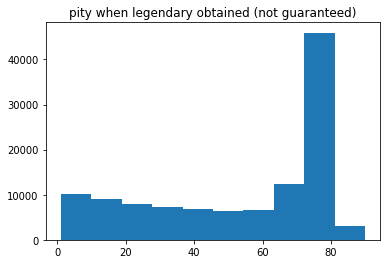

In [18]:
inds = np.where(np.logical_and(pulls['rarity'] == 5, pulls['guaranteed'] == 'f'))[0]
plt.hist(pulls['pity'][inds])

plt.title('pity when legendary obtained (not guaranteed)')

Text(0.5, 1.0, 'pity when rare obtained (not guaranteed)')

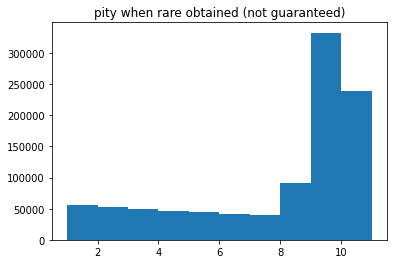

In [19]:
inds = np.where(np.logical_and(pulls['rarity'] == 4, pulls['guaranteed'] == 'f'))[0]
plt.hist(pulls['pity'][inds])

plt.title('pity when rare obtained (not guaranteed)')

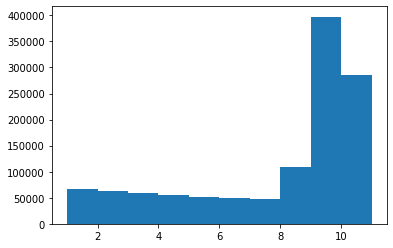

In [170]:
inds = np.where(pulls['rarity'] == 4)[0]
counts, _, _ = plt.hist(pulls['pity'][inds])

(array([47467., 47467., 47467., 47467., 47467., 47467., 47467., 47467.,
        47467., 51860.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

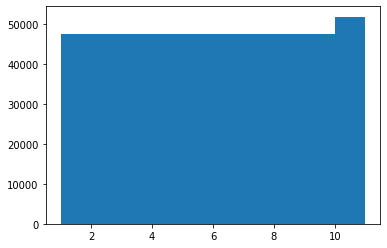

In [202]:
plt.hist(pulls['pity'].to_numpy()[all_inds])

In [334]:
from sklearn.model_selection import train_test_split

# grouped - 1 or 0
# guaranteed - 1 or 0
# type - 1(character) or 0(weapon)
# bannerId
# wishId

grouped = (pulls['grouped'].to_numpy() == 't').astype(int)
guaranteed = (pulls['guaranteed'].to_numpy() == 't').astype(int)
typ = (pulls['type'].to_numpy() == 'character').astype(int)
banner = pulls['bannerId'].to_numpy()
wish = pulls['wishId'].to_numpy()
raw_ML_data = np.array([grouped, guaranteed, typ, banner, wish]).transpose()



"""ind = np.where(pulls['rarity'] == 4)[0]

all_inds = []
for i in range(11):
    inds = np.where(pulls['pity'].to_numpy()[ind] == i+1)[0]
    perm = np.random.permutation(len(inds))[:int(min(counts))]
    all_inds = np.concatenate([all_inds, inds[perm]]).astype(int)

ML_data = ML_data[ind][all_inds]

ones = pulls['pity'].to_numpy()[ind][all_inds]-1
y = np.zeros(shape=(len(ones),11))

for i in range(len(y)):
    y[i][ones[i]] = 1"""



ind = np.where(pulls['rarity'] == 4)[0]
ML_data = raw_ML_data[ind]

ones = pulls['pity'].to_numpy()[ind]-1
y = np.zeros(shape=(len(ones),11))

for i in range(len(y)):
    y[i][ones[i]] = 1




X_train, X_test, y_train, y_test = train_test_split(ML_data, y, test_size=0.3, random_state=42)

X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(829468, 5) (829468, 11)
(238176, 5) (238176, 11)
(117311, 5) (117311, 11)


In [281]:
"""from sklearn.model_selection import train_test_split

# grouped - 1 or 0
# guaranteed - 1 or 0
# type - 1(character) or 0(weapon)
# bannerId
# wishId

grouped = (pulls['grouped'].to_numpy() == 't').astype(int)
guaranteed = (pulls['guaranteed'].to_numpy() == 't').astype(int)
typ = (pulls['type'].to_numpy() == 'character').astype(int)
banner = pulls['bannerId'].to_numpy()
wish = pulls['wishId'].to_numpy()

ML_data = np.array([grouped, guaranteed, typ, banner, wish]).transpose()
ind = np.where(pulls['rarity'] == 5)[0]
ML_data = ML_data[ind]


ones = pulls['pity'].to_numpy()[ind]-1
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
ones = np.digitize(ones, bins)
y = np.zeros(shape=(len(ones),11))

for i in range(len(y)):
    y[i][ones[i]] = 1

X_train, X_test, y_train, y_test = train_test_split(ML_data, y, test_size=0.3, random_state=42)


X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)"""

(95418, 5) (95418, 11)
(27398, 5) (27398, 11)
(13496, 5) (13496, 11)


In [286]:
inputs = tf.keras.Input(shape=(5,))

nn = tf.keras.layers.Dense(units=10)(inputs)
nn = tf.keras.layers.BatchNormalization()(nn)
nn = tf.keras.layers.Activation('relu')(nn)
nn = tf.keras.layers.Dropout(0.1)(nn)

nn = tf.keras.layers.Dense(units=10)(inputs)
nn = tf.keras.layers.BatchNormalization()(nn)
nn = tf.keras.layers.Activation('relu')(nn)
nn = tf.keras.layers.Dropout(0.1)(nn)

outputs = tf.keras.layers.Dense(units=11, activation='softmax')(nn)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [292]:
opt = tf.keras.optimizers.Adam(3e-5)
loss = 'categorical_crossentropy'
# loss = categorical_focal_loss(alpha=0.25, gamma=2)
model.compile(opt, loss=loss, metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=15, batch_size=200)

Epoch 1/15
478/478 [==============================] - 1s 2ms/step - loss: 1.8424 - accuracy: 0.4581 - val_loss: 1.8485 - val_accuracy: 0.4690
Epoch 2/15
478/478 [==============================] - 1s 2ms/step - loss: 1.8389 - accuracy: 0.4594 - val_loss: 1.8514 - val_accuracy: 0.4749
Epoch 3/15
478/478 [==============================] - 1s 2ms/step - loss: 1.8367 - accuracy: 0.4588 - val_loss: 1.8399 - val_accuracy: 0.4750
Epoch 4/15
478/478 [==============================] - 1s 2ms/step - loss: 1.8335 - accuracy: 0.4598 - val_loss: 1.8252 - val_accuracy: 0.4750
Epoch 5/15
478/478 [==============================] - 1s 2ms/step - loss: 1.8314 - accuracy: 0.4598 - val_loss: 1.8230 - val_accuracy: 0.4781
Epoch 6/15
478/478 [==============================] - 1s 2ms/step - loss: 1.8281 - accuracy: 0.4606 - val_loss: 1.8621 - val_accuracy: 0.4055
Epoch 7/15
478/478 [==============================] - 1s 2ms/step - loss: 1.8266 - accuracy: 0.4604 - val_loss: 1.8226 - val_accuracy: 0.4781
Epoch 

In [293]:
model.evaluate(X_test, y_test)

422/422 [==============================] - 0s 868us/step - loss: 1.7969 - accuracy: 0.4777


[1.796925663948059, 0.47769710421562195]

In [294]:
def pearson_r(y_true1, y_pred1):
    y_pred = tf.transpose(y_pred1)
    y_true = tf.transpose(y_true1)
    y_true = tf.cast(y_true, 'float32')
    y_pred = tf.cast(y_pred, 'float32')
    eps = tf.constant(1e-7, 'float32')
    mean_cross = tf.reduce_mean(tf.multiply(y_true, y_pred), axis=1)
    mean_true = tf.reduce_mean(y_true, axis=1)
    mean_true_sqr = tf.reduce_mean(tf.math.square(y_true), axis=1)
    norm_true = tf.math.sqrt(mean_true_sqr - tf.math.square(mean_true) + eps)
    mean_pred = tf.reduce_mean(y_pred, axis=1)
    mean_pred_sqr = tf.reduce_mean(tf.math.square(y_pred), axis=1)
    norm_pred = tf.math.sqrt(mean_pred_sqr - tf.math.square(mean_pred) + eps)
    covariance = mean_cross - tf.multiply(mean_true, mean_pred)
    correlation = tf.divide(covariance, tf.math.multiply(norm_true, norm_pred) + eps)
    return tf.reduce_mean(correlation)

In [295]:
preds = model.predict(X_test)

In [296]:
pearson_r(y_test, preds)

<tf.Tensor: shape=(), dtype=float32, numpy=0.13032408>

(array([2.000e+00, 0.000e+00, 8.710e+02, 6.447e+03, 7.240e+02, 7.490e+02,
        8.000e+02, 8.920e+02, 9.510e+02, 2.060e+03]),
 array([-3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <BarContainer object of 10 artists>)

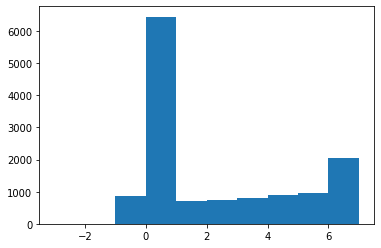

In [297]:
plt.hist(preds.argmax(axis=1) - y_test.argmax(axis=1))

(array([1265., 1149.,  928.,  906.,    0.,  784.,  788., 1578., 5350.,
         748.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

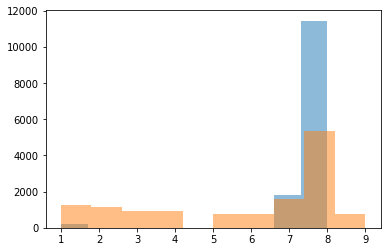

In [298]:
plt.hist(preds.argmax(axis=1), alpha=0.5)
plt.hist(y_test.argmax(axis=1), alpha=0.5)

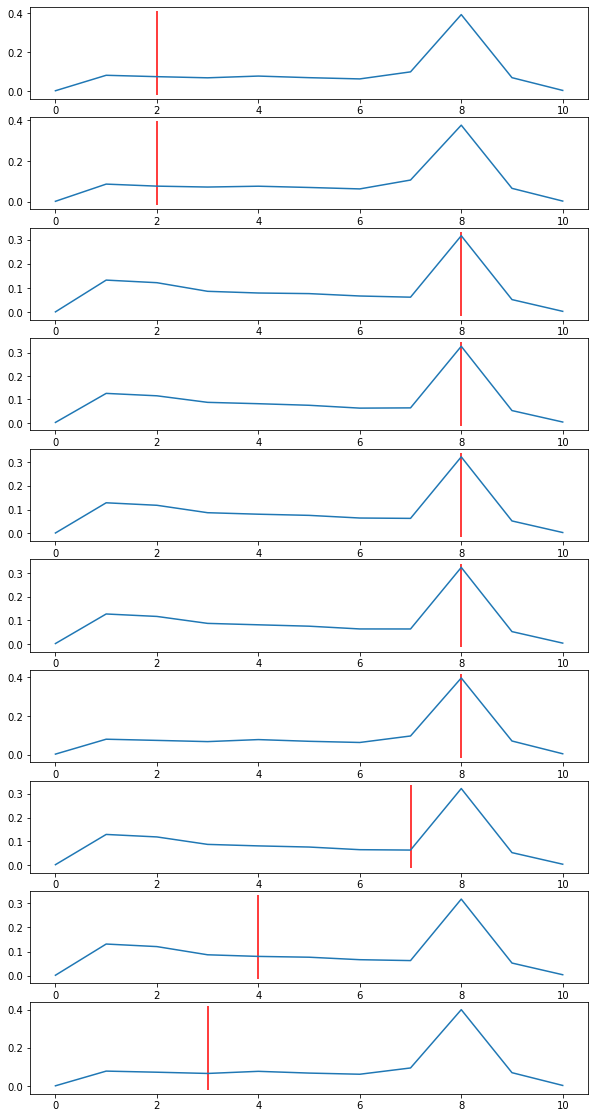

In [299]:
fig = plt.figure(figsize=(10, 20))
ax = fig.subplots(10, 1)

for i in range(len(ax)):
    ax[i].plot(np.arange(11), preds[i])
    ax[i].vlines(np.argmax(y_test[i]), ax[i].get_ylim()[0], ax[i].get_ylim()[1], color='red')

In [302]:
model.layers[1].get_weights()

[array([[ 0.28549203,  0.39934504, -0.09024055, -0.6445811 ,  0.6114863 ,
          0.0379075 ,  0.21959282,  0.63632065,  0.08684188,  0.47084394],
        [-0.05492074,  0.133542  , -0.3544752 ,  0.6410934 , -0.3496452 ,
          0.0351769 ,  0.5310582 , -0.15402563, -0.33796358, -0.4924799 ],
        [ 0.20115998,  0.38218024, -0.20909965,  0.8243566 ,  0.30214697,
          0.26641366,  0.58102435, -0.02596477,  0.3787836 , -0.4059406 ],
        [-0.48662835, -0.17922679,  0.0868822 , -0.16601829,  0.1119736 ,
         -0.11538157, -0.6543484 ,  0.21857543, -0.00687345,  0.2792803 ],
        [ 0.05121575,  0.44367665, -0.00252855, -0.83752435,  0.7736689 ,
         -0.52070767,  0.02313701, -0.41886827,  0.7609224 , -0.00180894]],
       dtype=float32),
 array([ 9.0237711e-07,  4.6955293e-07,  2.4567478e-06,  3.1296668e-08,
        -1.2644361e-07, -9.6748101e-07,  1.1570010e-07, -2.8589852e-07,
         4.6485155e-07, -7.0980946e-08], dtype=float32)]

In [303]:
original_weights = model.layers[1].get_weights().copy()

fields = ['grouped', 'guaranteed', 'type', 'bannerID', 'wishID']

for i in range(len(fields)):
    copy = original_weights[0].copy()
    copy[i] = np.zeros(shape=(copy.shape[1],))
    model.layers[1].set_weights((copy, original_weights[1]))
    print(f'Model performance without {fields[i]}')
    model.evaluate(X_test, y_test)
    
model.layers[1].set_weights(original_weights)

Model performance without grouped
422/422 [==============================] - 0s 806us/step - loss: 1.7969 - accuracy: 0.4777
Model performance without guaranteed
422/422 [==============================] - 0s 794us/step - loss: 1.7969 - accuracy: 0.4777
Model performance without type
422/422 [==============================] - 0s 814us/step - loss: 1.7969 - accuracy: 0.4777
Model performance without bannerID
422/422 [==============================] - 0s 854us/step - loss: 2.9741 - accuracy: 0.0854
Model performance without wishID
422/422 [==============================] - 0s 827us/step - loss: 51.1223 - accuracy: 0.3964


In [304]:
from sklearn.linear_model import LinearRegression

(array([1265., 1149.,  928.,  906.,    0.,  784.,  788., 1578., 5350.,
         748.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

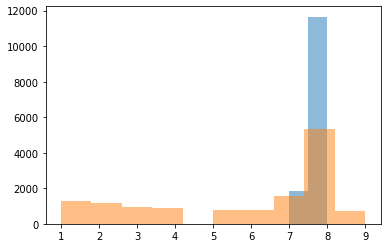

In [315]:
mod = LinearRegression()

mod.fit(X_train, y_train)

p = mod.predict(X_test)

plt.hist(p.argmax(axis=1), alpha=0.5)
plt.hist(y_test.argmax(axis=1), alpha=0.5)

(array([1.000e+00, 0.000e+00, 0.000e+00, 7.880e+02, 6.312e+03, 7.240e+02,
        1.549e+03, 8.940e+02, 9.510e+02, 2.277e+03]),
 array([-6. , -4.7, -3.4, -2.1, -0.8,  0.5,  1.8,  3.1,  4.4,  5.7,  7. ]),
 <BarContainer object of 10 artists>)

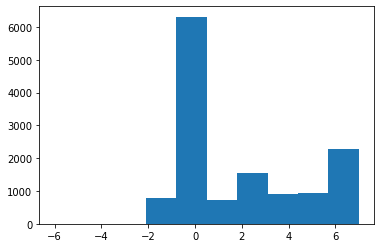

In [316]:
plt.hist(p.argmax(axis=1) - y_test.argmax(axis=1))

In [312]:
pearson_r(y_test, p)

<tf.Tensor: shape=(), dtype=float32, numpy=0.109884456>

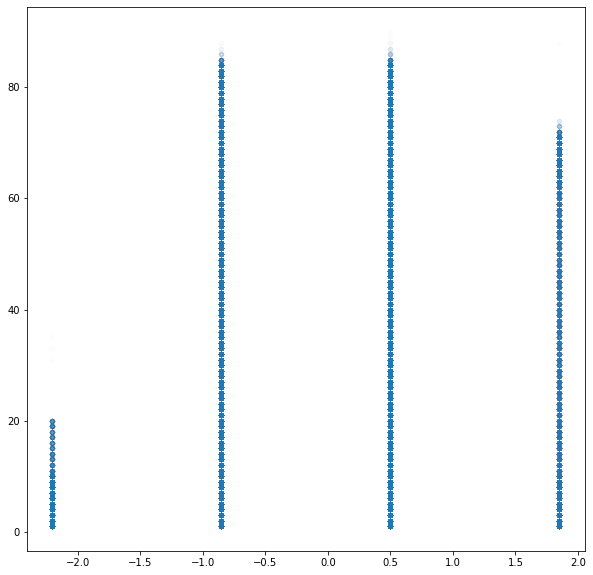

In [331]:
n = pulls['bannerId']
n = (n - np.mean(n))/np.std(n)

plt.scatter(n, pulls['pity'], alpha=0.01, s=20)

In [333]:
banners = pulls['bannerId']
u = np.unique(banners)

In [343]:
dists = []

for i in range(len(u)):
    inds = np.where(np.logical_and(banners == u[i], pulls['rarity']==4))
    d = raw_ML_data[inds]
    if len(d) == 0:
        continue
    pred = model.predict(d)
    dists.append(np.mean(pred, axis=0))

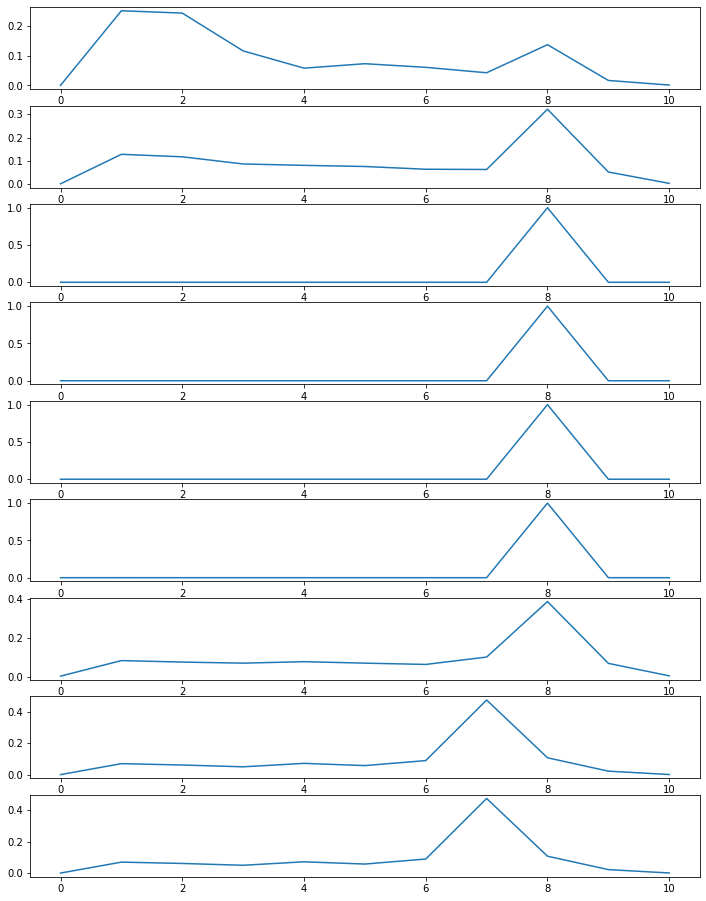

In [357]:
fig = plt.figure(figsize=(12, 16))
ax = fig.subplots(9, 1)

j = 0
for i in [0, 1, 2, 3, 4, 8, 10, -2, -1]:
    ax[j].plot(np.arange(11), dists[i])
    j += 1